## Part A
Team Members:

1.   **Anthony Anabire            | 202350952**
2.   **Usama Ali                  | 202353111**
3.   **Ogochukwu Joshua Onwubolu  | 202458434**
4.  **Muhammad Armaghan Mehmood   | 202458718**
5.  **Muyiwa Emmanuel Malomo      | 202366317**

**Goal for this Notebook:** It aims to predict whether the article is relevant to the user's information need.

[Relevance_Data](https://www.kaggle.com/competitions/cs985-987-relevance-prediction-2024/data)


## 3 Layer NN

In [ ]:
#importing the important libraries

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
# Load training data
train_data = pd.read_parquet('/content/sample_data/relevance_train.parquet')
train_data.head(5)

,doc_id,judgement,author,body,byline,title,topic_id,description,narrative,topic_title
0,004c6120d0aa69da29cc045da0562168,0,Terrence McCoy,"<p>More than 60 years ago, a fair-skinned Iris...",By Terrence McCoy,Report on Irish baby homes documents use of in...,321,Pertinent documents will reflect the fact that...,Pertinent documents relating to this issue wil...,Women in Parliaments
1,005a1f0c2064487a7f15443b2a5f349a,0,Brian McNoldy,"<p>Hurricane Fred, which formed over the weeke...",By Brian McNoldy,Hurricane Fred is a fountain of ‘firsts’ in th...,321,Pertinent documents will reflect the fact that...,Pertinent documents relating to this issue wil...,Women in Parliaments
2,00722094-2935-11e2-b4e0-346287b7e56c,0,Editorial Board,"<p>EIGHT YEARS AGO this month, an inspiring mo...",By Editorial Board,Ukraine slides away from democracy,321,Pertinent documents will reflect the fact that...,Pertinent documents relating to this issue wil...,Women in Parliaments
3,007d2856-7cc4-11e4-84d4-7c896b90abdc,0,Adam Bernstein,"<p>Mary Burke Washington, an economist who was...",By Adam Bernstein,"Mary Washington, government official and widow...",321,Pertinent documents will reflect the fact that...,Pertinent documents relating to this issue wil...,Women in Parliaments
4,009aafb6-0283-11e6-8bb1-f124a43f84dc,0,None,"<p>When Treasury Secretary Jack Lew <a href=""h...",None,Will women be shortchanged again?,321,Pertinent documents will reflect the fact that...,Pertinent documents relating to this issue wil...,Women in Parliaments


In [ ]:
# Load test data
test_data = pd.read_parquet('/content/sample_data/relevance_test.parquet')
test_data.head(5)

,doc_id,author,body,byline,title,topic_id,description,narrative,topic_title
2050,0002e4f816c863e4b912d6d97dcb68ad,Max Bearak,<p>The United Nations Human Rights Committee <...,By Max Bearak,A U.N. judgment says Ireland’s anti-abortion l...,350,Is it hazardous to the health of individuals t...,Relevant documents would contain any informati...,Health and Computer Terminals
2051,000c86ea-55df-11e2-bf3e-76c0a789346f,Simson Garfinkel,"<p>In January 1976, Ray Kurzweil introduced th...",By Simson Garfinkel,‘How to Create a Mind: The Secret of Human Tho...,350,Is it hazardous to the health of individuals t...,Relevant documents would contain any informati...,Health and Computer Terminals
2052,001b27476dfbcdd1431b1607419d83af,Burke Balch,"<p><strong><em>Each week, </em><a href=""http:/...",By Burke Balch,Why are we more interested in pushing death th...,350,Is it hazardous to the health of individuals t...,Relevant documents would contain any informati...,Health and Computer Terminals
2053,001eb05a-719e-11e3-8b3f-b1666705ca3b,Juliet Eilperin; Amy Goldstein,<p>The Obama administration has decided to jet...,By Juliet Eilperin and Amy Goldstein,Obama administration to end contract with CGI ...,350,Is it hazardous to the health of individuals t...,Relevant documents would contain any informati...,Health and Computer Terminals
2054,0058b29067c414f21b35c8f64cb49e64,Ariana Eunjung Cha,<p>The adolescent years are when people's bodi...,By Ariana Eunjung Cha,Teenagers are as sedentary as 60-year-olds by ...,350,Is it hazardous to the health of individuals t...,Relevant documents would contain any informati...,Health and Computer Terminals


Preprocessing textual data for a classification task and filling missing values in the 'title' column of both the training and test datasets with empty strings. Then, using vectorization to convert the text data into numerical feature representations.

In [ ]:
train_data['title'].fillna("", inplace=True) #Replacing missing value
test_data['title'].fillna("", inplace=True) #Replacing missing value
# Preprocess data
vectorizer = TfidfVectorizer(max_features=1000)  # Limit number of features for simplicity
X_train = vectorizer.fit_transform(train_data['title']).toarray()  # Assuming 'title' for simplicity
y_train = train_data['judgement']
X_test = vectorizer.transform(test_data['title']).toarray()  # Transform, do not fit!

print(X_train)

print( y_train)

print(X_test)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.27678493 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
0        0
1        0
2        0
3        0
4        0
        ..
26228    0
26229    0
26230    0
26231    0
26232    0
Name: judgement, Length: 21120, dtype: int64
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/var/folders/v7/cwbh33914jn11nmb64qz74b80000gn/T/ipykernel_36735/2859589481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['title'].fillna("", inplace=True) #Replacing missing value
/var/folders/v7/cwbh33914jn11nmb64qz74b80000gn/T/ipykernel_36735/2859589481.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

Defining a function named train_and_evaluate_model to train and evaluate a neural network model with a specified number of neurons. The function constructs a sequential model with one input layer, one or more hidden layers with relu activation, and an output layer with sigmoid activation. The model is compiled with the Adam optimizer and binary cross-entropy loss function. It is then trained on the training data (X_train and y_train) for a fixed number of epochs and batch size.

In [ ]:
# Define a function to train and evaluate the model
def train_and_evaluate_model(neurons):
    model = models.Sequential([
        layers.Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(neurons // 2, activation='relu'),  # Adding a hidden layer
        layers.Dense(1, activation='sigmoid')#output layer
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)  # Reduce verbosity

    return model.evaluate(X_train, y_train, verbose=0)[1]  # Return accuracy; this is a simplification


Setting a range of neuron values for the hidden layer in a neural network model. Then iterating over this range, training and evaluating a model for each specified number of neurons using the train_and_evaluate_model function defined earlier.

In [ ]:
# Define the range and points for neurons in the hidden layer
neurons_range = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450]

# Train models and record their performance
performance = [train_and_evaluate_model(neurons) for neurons in neurons_range]


/Users/armaghan/Downloads/DeepLearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Plotting with the x-axis representing the number of neurons and the y-axis representing the model's performance.

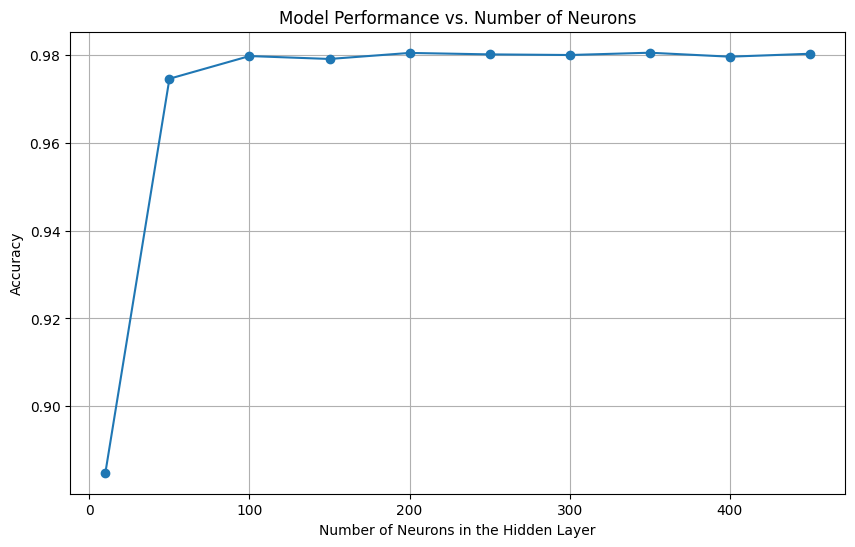

In [ ]:
# Plotting the performance
plt.figure(figsize=(10, 6))
plt.plot(neurons_range, performance, marker='o', linestyle='-')
plt.title('Model Performance vs. Number of Neurons')
plt.xlabel('Number of Neurons in the Hidden Layer')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## Deep NN model

Constructing a sequential model with the specified number of hidden layers, each containing 100 neurons and using the specified activation function. The model is compiled with the Adam optimizer and binary cross-entropy loss function. It then trains the model on the training data (X_train and y_train) for 10 epochs with a batch size of 32 and a validation split of 20%.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.metrics import accuracy_score

def train_model(layers_count, activation='relu'):
    model = models.Sequential()
    model.add(layers.Dense(100, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(layers_count - 2):  # Minus input and output layer
        model.add(layers.Dense(100, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
    val_acc = history.history['val_accuracy'][-1]  # Last validation accuracy
    return val_acc


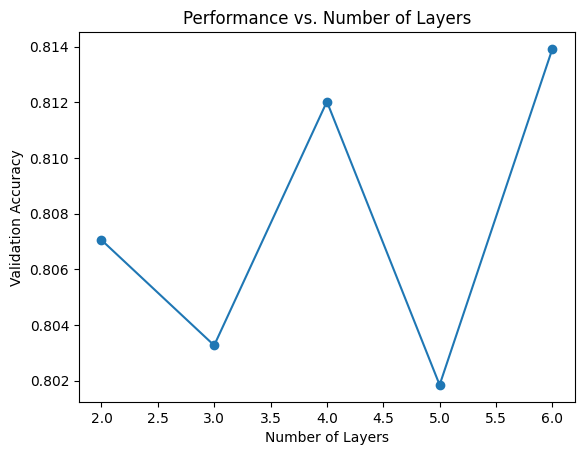

In [ ]:
# Experiment with different numbers of layers
layer_counts = [2, 3, 4, 5, 6]
performances = [train_model(count) for count in layer_counts]

# Plotting
plt.plot(layer_counts, performances, marker='o')
plt.title('Performance vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Validation Accuracy')
plt.show()


Bar plot where each bar represents the performance (validation accuracy) achieved by a specific activation function

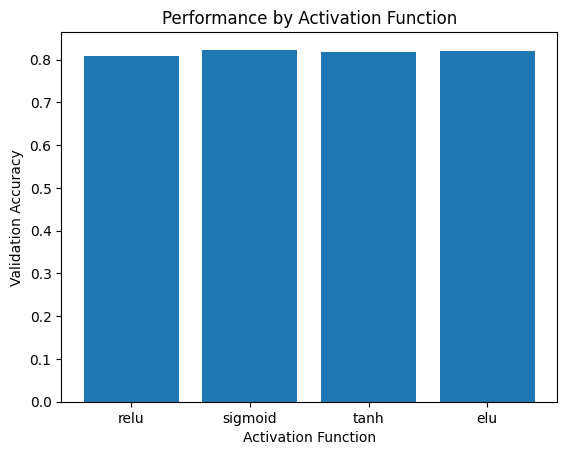

In [ ]:
activation_functions = ['relu', 'sigmoid', 'tanh', 'elu']
activation_performances = [train_model(2, activation=func) for func in activation_functions]  # Using 3-layer model

# Bar plot
plt.bar(activation_functions, activation_performances)
plt.title('Performance by Activation Function')
plt.xlabel('Activation Function')
plt.ylabel('Validation Accuracy')
plt.show()


## Complex NN Models


### **LSTM**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
texts = train_data['body'].fillna(" ").values  # Using 'body' column; replace NaN with blank strings
labels = train_data['judgement'].values

Initialized a tokenizer with a maximum vocabulary size of 5000 words (num_words=5000). The tokenizer then fits on the textual data (texts) using the fit_on_texts method.  After fitting the tokenizer, the texts are converted to sequences of integers using the texts_to_sequences method, where each word in the texts is replaced by its corresponding integer index in the vocabulary.

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

Calculating the maximum length of sequences among all sequences derived from textual data. Then padding these sequences to have uniform lengths using the determined maximum length. And converting the labels associated with the data into a numpy array format.

In [ ]:
max_len = max([len(seq) for seq in sequences])

padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Convert labels to numpy array
labels = np.array(labels)

Defining a neural network model for text classification using Keras. The model architecture includes an embedding layer, which converts integer-encoded words into dense vectors, followed by an LSTM layer with 128 units to capture sequence dependencies. Lastly, a dense output layer with sigmoid activation is added for binary classification. The model is compiled with the Adam optimizer, binary cross-entropy loss function, and accuracy as the evaluation metric.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

#,input_length=max_len

print(max_len)
model = Sequential([
    Embedding(input_dim=5000,output_dim=100 ),  # Adjust embedding layer parameters as needed
    LSTM(units=128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


7472


Training the defined neural network model on the padded sequences of textual data (padded_sequences) along with their corresponding labels (labels). The training is conducted with a batch size of 32 and for a single epoch.

In [ ]:
model.fit(padded_sequences, labels, batch_size=32, epochs=1, validation_split=0.2)


528/528 ━━━━━━━━━━━━━━━━━━━━ 2161s 4s/step - accuracy: 0.8444 - loss: 0.4447 - val_accuracy: 0.8300 - val_loss: 0.4767


Preparing textual data from the test dataset (test_data) for model evaluation. The 'body' column is extracted and missing values are filled with blank strings. Then, the textual data is tokenized using the same tokenizer previously fit on the training data. The tokenized texts are converted into sequences of integers, and then padded to have uniform length using the maximum sequence length determined during training.

In [ ]:
test_texts = test_data['body'].fillna(" ").values  # Using 'body' column; replace NaN with blank strings
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_len)

Making predictions using the trained model on the padded sequences of textual data from the test dataset.

In [ ]:
# Make predictions
predictions = model.predict(test_padded_sequences)
predicted_labels = (predictions > 0.5).astype(int)


160/160 ━━━━━━━━━━━━━━━━━━━━ 148s 924ms/step


Evaluating the trained model on the validation set, and computing the validation loss and accuracy.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Accuracy: {val_accuracy:.4f}")

132/132 - 127s - 965ms/step - accuracy: 0.8473 - loss: 0.4101
Validation Accuracy: 0.8473


### GRU


The textual data is tokenized into sequences of integers using the fitted tokenizer. The maximum length of the sequences is determined.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
texts_subset = train_data['body'].fillna(" ").values
labels_subset = train_data['judgement'].values

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts_subset)
sequences = tokenizer.texts_to_sequences(texts_subset)

max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

labels = np.array(labels_subset)

The dataset comprising padded sequences (padded_sequences) and their corresponding labels (labels) is split into training and validation sets using the train_test_split function from Scikit-Learn. The resulting training and validation sets consist of padded sequences for training/validation data and labels for training/validation labels, respectively.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_padded, val_padded, train_labels, val_labels = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42)


Creating the model with embedding layer, which converts integer-encoded words into dense vectors, followed by a GRU layer with 128 units to capture sequence information. A dense output layer with sigmoid activation is added for binary classification.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

#, input_length=max_length

model_gru = Sequential([
    Embedding(input_dim=5000, output_dim=100),
    GRU(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model_gru.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model_gru.fit(train_padded, train_labels,
          batch_size=32, epochs=1,
          validation_data=(val_padded, val_labels))


528/528 ━━━━━━━━━━━━━━━━━━━━ 1977s 4s/step - accuracy: 0.8454 - loss: nan - val_accuracy: 0.8345 - val_loss: nan


In [ ]:
# Display the first 5 rows of the train_data DataFrame
train_data.head(5)

,doc_id,judgement,author,body,byline,title,topic_id,description,narrative,topic_title
0,004c6120d0aa69da29cc045da0562168,0,Terrence McCoy,"<p>More than 60 years ago, a fair-skinned Iris...",By Terrence McCoy,Report on Irish baby homes documents use of in...,321,Pertinent documents will reflect the fact that...,Pertinent documents relating to this issue wil...,Women in Parliaments
1,005a1f0c2064487a7f15443b2a5f349a,0,Brian McNoldy,"<p>Hurricane Fred, which formed over the weeke...",By Brian McNoldy,Hurricane Fred is a fountain of ‘firsts’ in th...,321,Pertinent documents will reflect the fact that...,Pertinent documents relating to this issue wil...,Women in Parliaments
2,00722094-2935-11e2-b4e0-346287b7e56c,0,Editorial Board,"<p>EIGHT YEARS AGO this month, an inspiring mo...",By Editorial Board,Ukraine slides away from democracy,321,Pertinent documents will reflect the fact that...,Pertinent documents relating to this issue wil...,Women in Parliaments
3,007d2856-7cc4-11e4-84d4-7c896b90abdc,0,Adam Bernstein,"<p>Mary Burke Washington, an economist who was...",By Adam Bernstein,"Mary Washington, government official and widow...",321,Pertinent documents will reflect the fact that...,Pertinent documents relating to this issue wil...,Women in Parliaments
4,009aafb6-0283-11e6-8bb1-f124a43f84dc,0,None,"<p>When Treasury Secretary Jack Lew <a href=""h...",None,Will women be shortchanged again?,321,Pertinent documents will reflect the fact that...,Pertinent documents relating to this issue wil...,Women in Parliaments


In [ ]:
# Check the shape of the padded sequences for the test data
test_padded_sequences.shape

(5113, 7472)

In [ ]:
# Check the input shape of the GRU model
model_gru.input_shape

(32, 7472)

Making the predictions using the trained GRU model on the padded test sequences and applying a threshold of 0.46 to the predicted probabilities to obtain binary labels. Creating a submission DataFrame containing the document IDs and the predicted judgment labels.

In [ ]:
test_subset = test_data['body'].fillna(" ").values
test_tokenizer = Tokenizer(num_words=5000)
test_tokenizer.fit_on_texts(test_subset)
test_sequences = test_tokenizer.texts_to_sequences(test_subset)

temp = test_data['doc_id'].fillna(" ").values

test_max_length = max([len(seq) for seq in test_sequences])
test_padded_sequences = pad_sequences(test_sequences, maxlen=test_max_length)
test_max_length = max_length = model_gru.input_shape[1]
test_padded_sequences = pad_sequences(test_sequences, maxlen=test_max_length)
pred=model_gru.predict(test_padded_sequences)
test_predicted_labels = (pred > 0.46).astype(int)
# test_predicted_labels = np.argmax(pred, axis=-1)
test_predicted_labels = np.array(test_predicted_labels).flatten()

print(test_predicted_labels)
print(pred)
# Create a submission DataFrame with the id and the predicted 'emotion'
submission_df = pd.DataFrame({
    'id': temp,  # Replace with your test data IDs
    'judgement': test_predicted_labels

})

# Save the DataFrame to a CSV file
submission_csv_path = '/content/sample_data/DeepLearning/submission.csv'
submission_df.to_csv(submission_csv_path, index=False)



160/160 ━━━━━━━━━━━━━━━━━━━━ 126s 789ms/step
[0 0 0 ... 0 0 0]
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


In [ ]:
# Print the shape of the test padded sequences array
print(test_padded_sequences.shape)

# Print the first two sequences from the test padded sequences array
print(test_padded_sequences[:2])

(5113, 7472)
[[   0    0    0 ...    2   74    2]
 [   0    0    0 ...  846 3862    2]]


The model predicts the probability of each sequence belonging to the positive class. Then, we convert these probabilities to binary labels by thresholding at 0.5, where probabilities greater than 0.5 are classified as positive (1) and those less than or equal to 0.5 are classified as negative (0).

In [ ]:
# Make predictions
predictions = model.predict(val_padded)
predicted_labels = (predictions > 0.5).astype(int)


132/132 ━━━━━━━━━━━━━━━━━━━━ 111s 843ms/step


Calculate the accuracy of the predicted labels (predicted_labels) compared to the true validation labels (val_labels). This accuracy metric represents the proportion of correctly predicted labels over the total number of validation samples.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(val_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

# More detailed performance analysis
print(classification_report(val_labels, predicted_labels))

Accuracy: 0.8473011363636364
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3525
           1       0.95      0.08      0.15       699

    accuracy                           0.85      4224
   macro avg       0.90      0.54      0.53      4224
weighted avg       0.86      0.85      0.79      4224



Kaggle Score

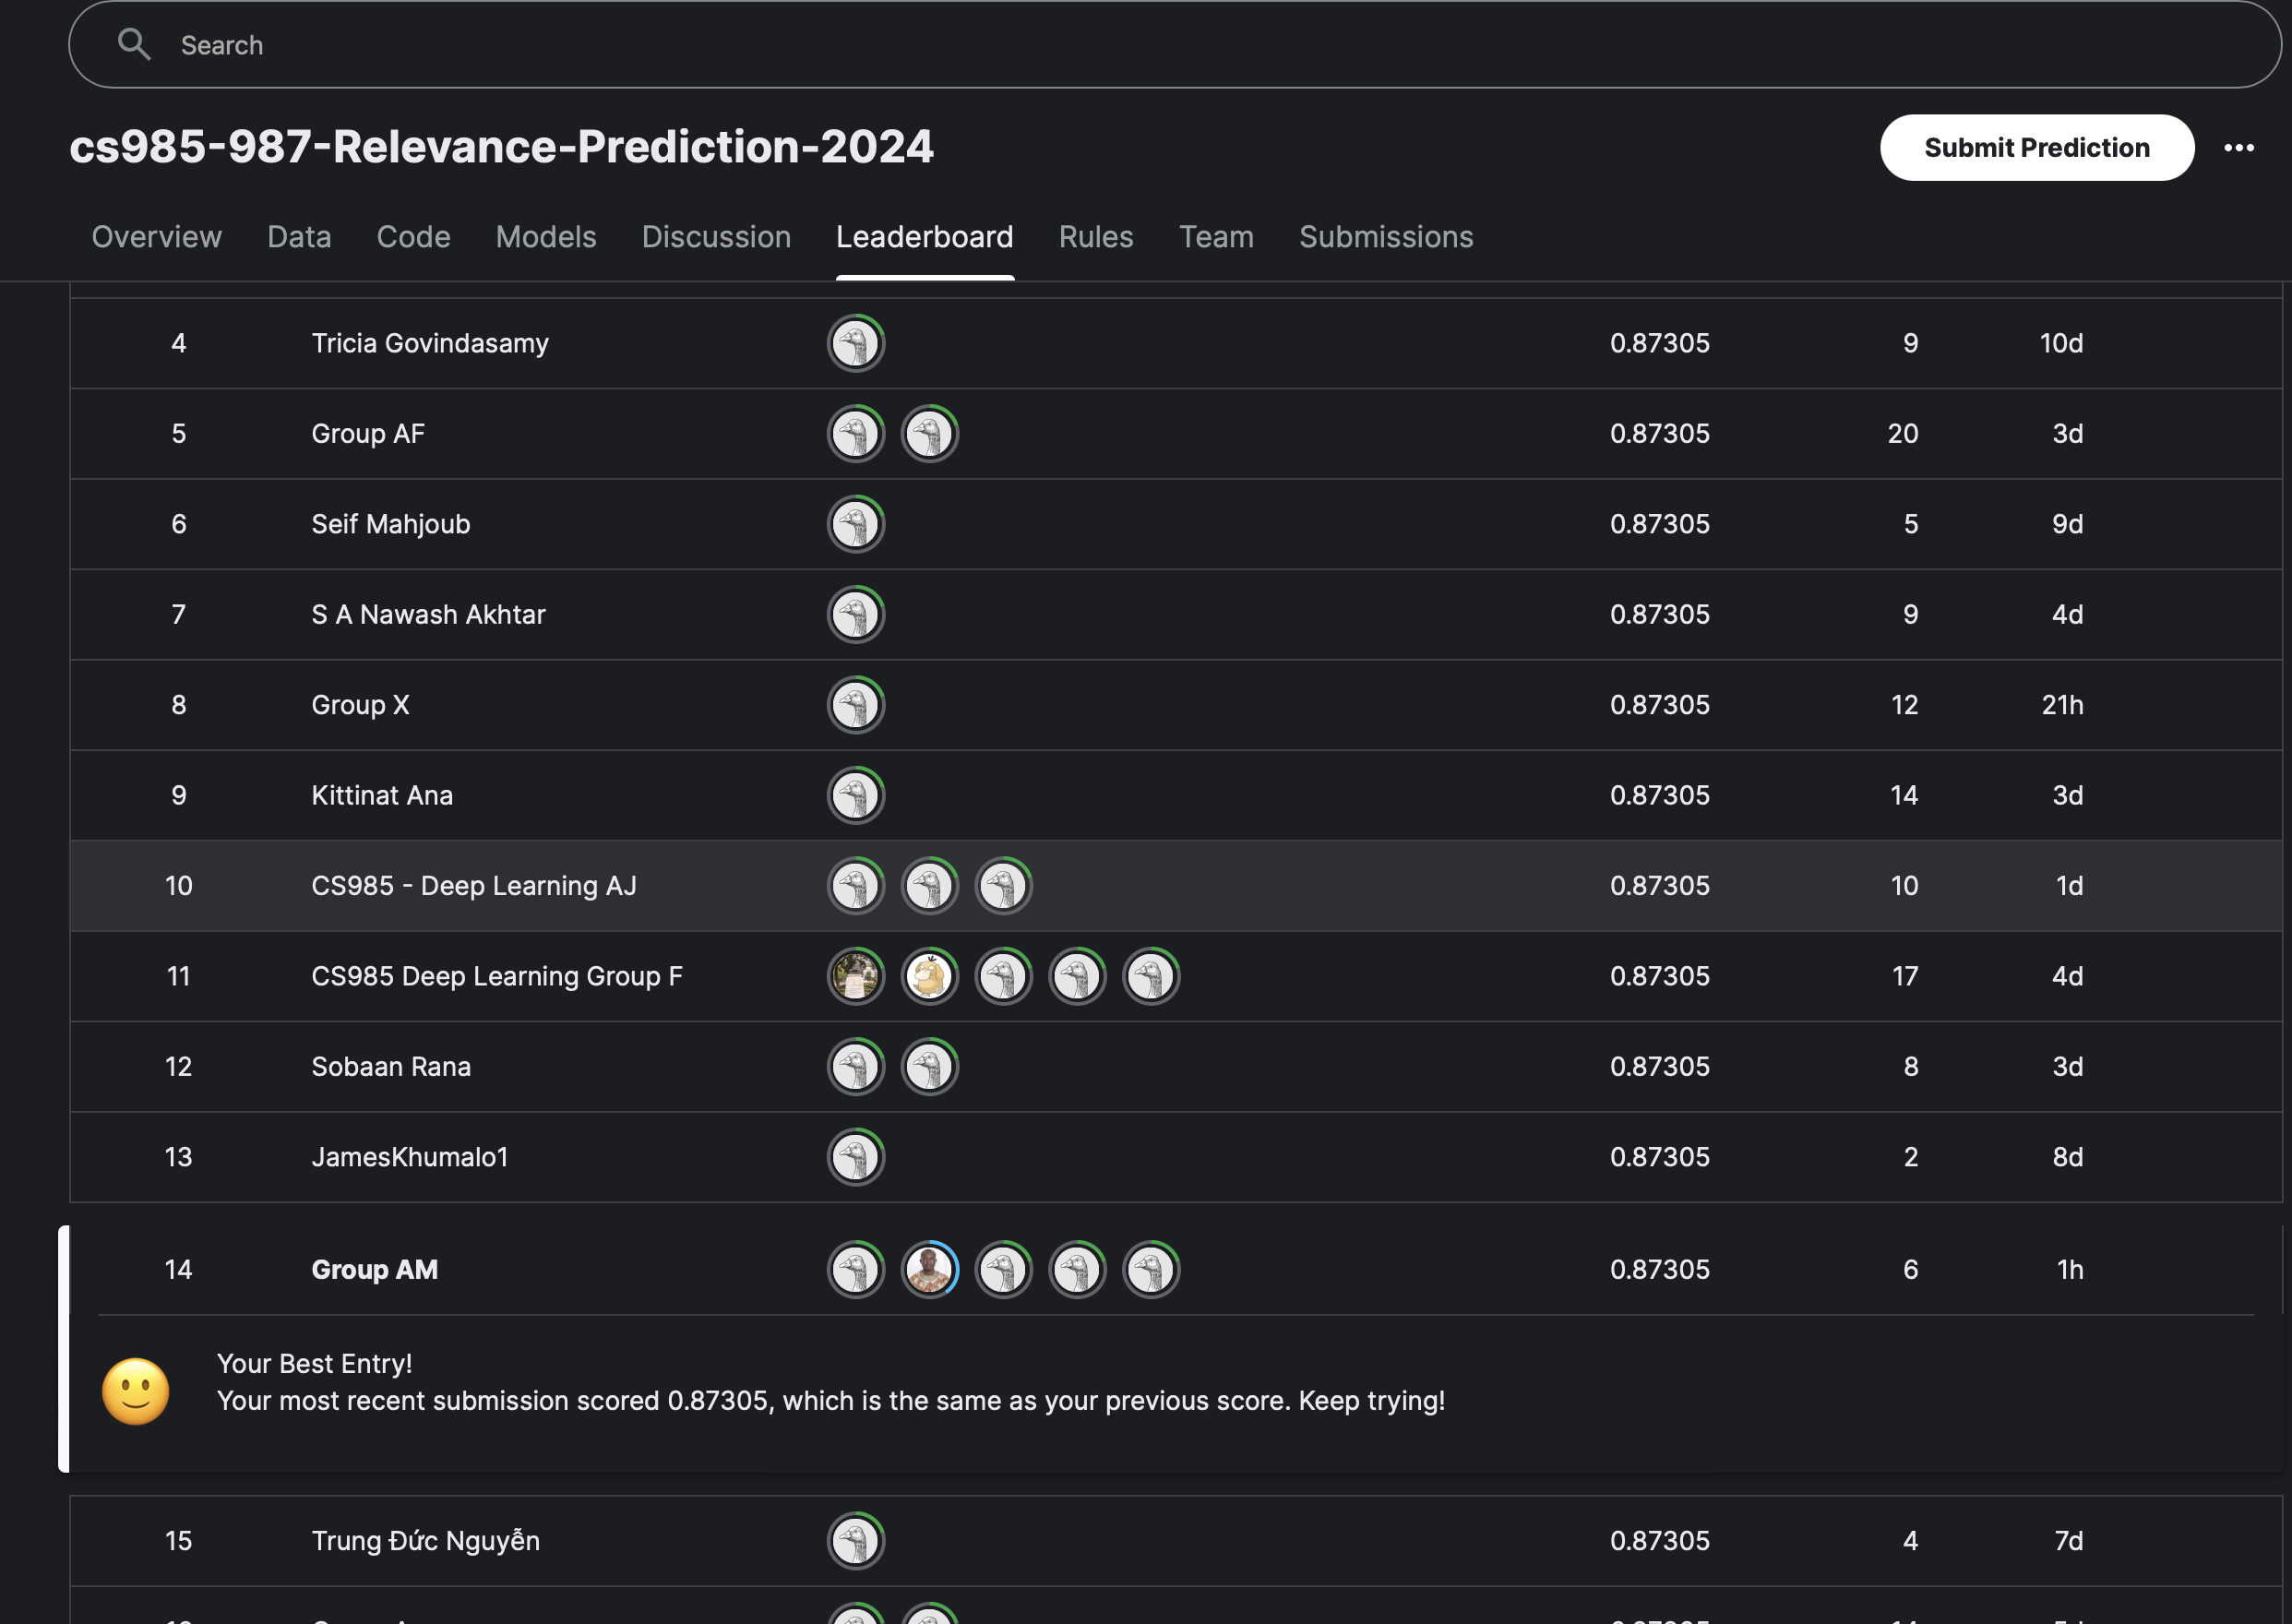